In [1]:
import sklearn

In [5]:
import seaborn as sns

In [6]:
import pandas as pd

In [183]:
from sklearn.metrics import confusion_matrix, classification_report

In [368]:
ground_truth_path = r"D:/deepfakes/data/test/labels.csv"

In [369]:
results = r"D:/deepfakes/inference/final.csv"

In [3]:
target_names = ["REAL", "FAKE"]

In [370]:
results = pd.read_csv(results)

In [371]:
results

,filename,label
0,4000.mp4,0.736819
1,4001.mp4,0.746405
2,4002.mp4,0.461306
3,4003.mp4,0.785006
4,4004.mp4,0.273184
...,...,...
3995,7995.mp4,0.578490
3996,7996.mp4,0.822390
3997,7997.mp4,0.501623
3998,7998.mp4,0.611753


In [300]:
results.loc[results['label'] > 0.6, 'label'] = 1

In [301]:
results.loc[results['label'] <= 0.6, 'label'] = 0

In [351]:
result_labels = results.label.values

## Prepare Data for evaluation

In [304]:
ground_truth = pd.read_csv(ground_truth_path)

In [305]:
ground_truth

,filename,label
0,4000.mp4,1
1,4001.mp4,1
2,4002.mp4,1
3,4003.mp4,0
4,4004.mp4,0
...,...,...
3995,7995.mp4,0
3996,7996.mp4,0
3997,7997.mp4,0
3998,7998.mp4,1


In [307]:
truth_labels = ground_truth["label"].values

In [308]:
truth_labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Plotting

In [357]:
cm = confusion_matrix(truth_labels, result_labels)

In [358]:
cm

array([[ 903, 1097],
       [ 620, 1380]], dtype=int64)

In [359]:
import matplotlib.pyplot as plt

<AxesSubplot:>

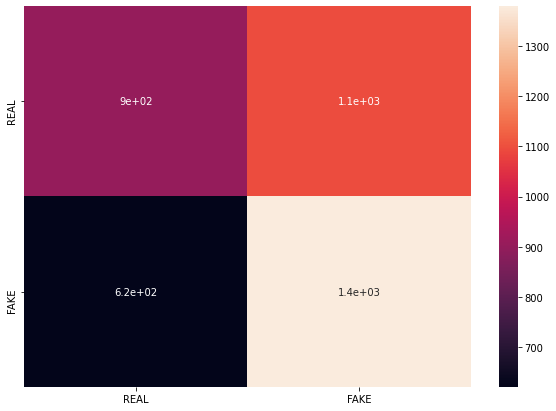

In [360]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [361]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, result_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.59      0.45      0.51      2000
        FAKE       0.56      0.69      0.62      2000

    accuracy                           0.57      4000
   macro avg       0.58      0.57      0.56      4000
weighted avg       0.58      0.57      0.56      4000


